# A Slow March of Type

<a href="https://colab.research.google.com/github/sparks-baird/matbench-genmetrics/blob/main/notebooks/core/2.0-matbench-genmetrics-materials_discovery_progress_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook employs a "slow march of time" benchmarking strategy within the `mp_time_split` subpackage. By treating materials discovered in the future as generated data, the script benchmarks the progress of materials discovery over time. Since the training data precedes the test data for a given fold, by using the training data from the *next* fold as the generated data, we can get a better understanding of the nature of these benchmarks in the context of real-world data.

<font color="red">**NOTE: If using Colab, "Restart Runtime" after installation.**</font>

In [1]:
try:
    import google.colab  # type: ignore # noqa: F401
    from google.colab import output
    output.enable_custom_widget_manager()
    %pip install git+https://github.com/sparks-baird/matbench-genmetrics.git
except ImportError:
    print("not in Colab")

not in Colab


In [3]:
%%time
from pprint import pprint
from tqdm.notebook import tqdm
from matbench_genmetrics.core.metrics import MPTSMetrics

n = 5396 # number of structures in each fold

# Instantiate the "real" metric class
mptm = MPTSMetrics(dummy=False, verbose=True, num_gen=n)

# Instantiate a second metric class used to grab data from the next fold (i.e., as if that data were generated by a generative model)
mptm2 = MPTSMetrics(dummy=False, verbose=True, num_gen=n)
for fold in tqdm(mptm.folds[0:4]):  
    train_val_inputs_1, test_structures = mptm.get_train_and_val_data(fold, return_test=True)

    # Get the "future" data and treat it as if it were generated by a generative model
    train_val_inputs_2, gen_structures = mptm2.get_train_and_val_data(fold + 1, return_test=True)

    mptm.evaluate_and_record(fold, gen_structures)
    
pprint(mptm.recorded_metrics)

  0%|          | 0/4 [00:00<?, ?it/s]

Reading file c:\Users\hasan\miniconda3\envs\matbench-genmetrics\lib\site-packages\matbench_genmetrics\mp_time_split\utils\mp_time_summary.json.gz: 0it [00:47, ?it/s]#####9| 40453/40476 [00:46<00:00, 874.82it/s] 
Decoding objects from c:\Users\hasan\miniconda3\envs\matbench-genmetrics\lib\site-packages\matbench_genmetrics\mp_time_split\utils\mp_time_summary.json.gz: 100%|##########| 40476/40476 [00:47<00:00, 860.28it/s]
Reading file c:\Users\hasan\miniconda3\envs\matbench-genmetrics\lib\site-packages\matbench_genmetrics\mp_time_split\utils\mp_time_summary.json.gz: 0it [00:54, ?it/s]#####9| 40460/40476 [00:53<00:00, 624.34it/s] 
Decoding objects from c:\Users\hasan\miniconda3\envs\matbench-genmetrics\lib\site-packages\matbench_genmetrics\mp_time_split\utils\mp_time_summary.json.gz: 100%|##########| 40476/40476 [00:54<00:00, 747.36it/s]
SiteStatsFingerprint: 100%|██████████| 5396/5396 [42:20<00:00,  2.12it/s]
Reading file c:\Users\hasan\miniconda3\envs\matbench-genmetrics\lib\site-package

{0: {'coverage': 0.03280207561156412,
     'novelty': 0.9571905114899926,
     'uniqueness': 0.9998874668429091,
     'validity': 0.9657295385947532},
 1: {'coverage': 0.032987398072646404,
     'novelty': 0.948295033358043,
     'uniqueness': 0.9999187947547732,
     'validity': 0.9689630506461338},
 2: {'coverage': 0.019644180874722018,
     'novelty': 0.9529280948851001,
     'uniqueness': 0.999984404745629,
     'validity': 0.942820170335924},
 3: {'coverage': 0.02575982209043736,
     'novelty': 0.939770200148258,
     'uniqueness': 0.9999801452488405,
     'validity': 0.8635418248589397}}
CPU times: total: 4min 30s
Wall time: 3h 48min 31s


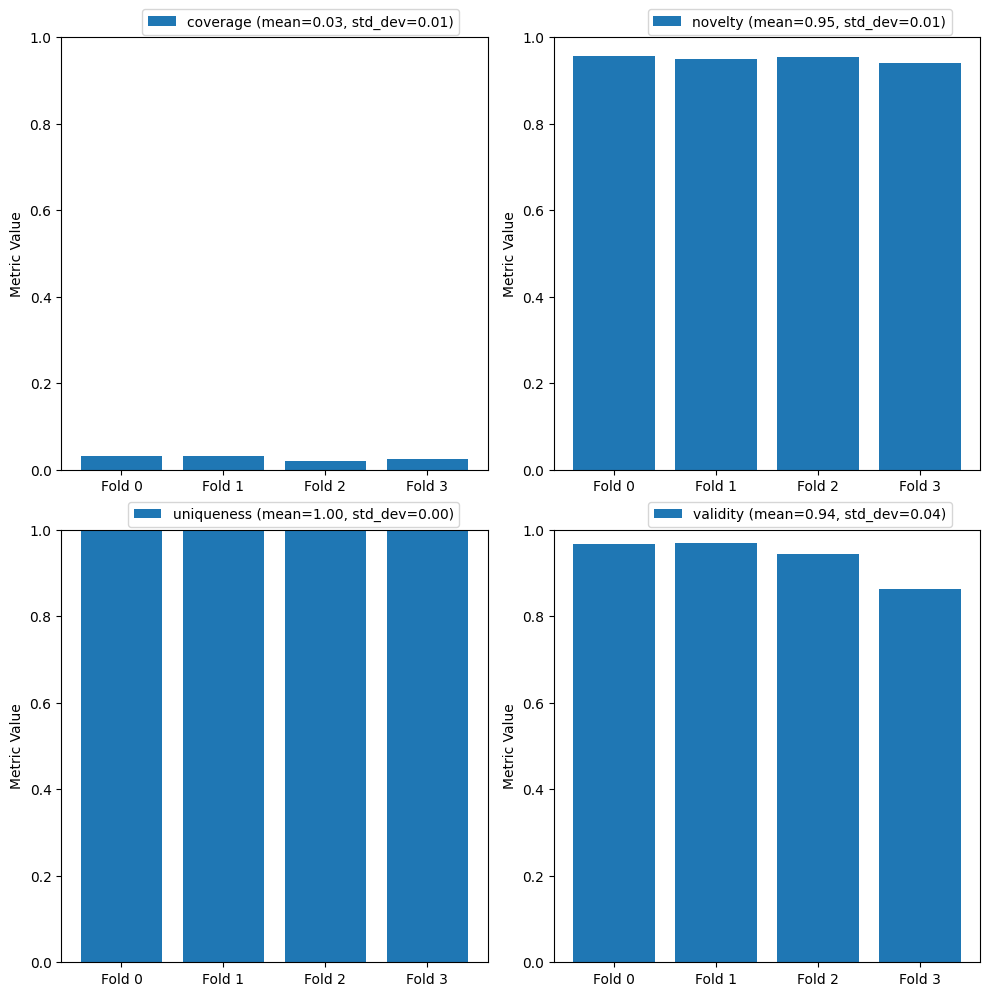

In [16]:
metrics = {
    0: {
        "coverage": 0.03280207561156412,
        "novelty": 0.9571905114899926,
        "uniqueness": 0.9998874668429091,
        "validity": 0.9657295385947532,
    },
    1: {
        "coverage": 0.032987398072646404,
        "novelty": 0.948295033358043,
        "uniqueness": 0.9999187947547732,
        "validity": 0.9689630506461338,
    },
    2: {
        "coverage": 0.019644180874722018,
        "novelty": 0.9529280948851001,
        "uniqueness": 0.999984404745629,
        "validity": 0.942820170335924,
    },
    3: {
        "coverage": 0.02575982209043736,
        "novelty": 0.939770200148258,
        "uniqueness": 0.9999801452488405,
        "validity": 0.8635418248589397,
    },
}

coverage = [metrics[i]["coverage"] for i in metrics]
novelty = [metrics[i]["novelty"] for i in metrics]
uniqueness = [metrics[i]["uniqueness"] for i in metrics]
validity = [metrics[i]["validity"] for i in metrics]

# Plot the metrics
import matplotlib.pyplot as plt
import numpy as np

# Plot each metric on its own subplot
metrics_list = [coverage, novelty, uniqueness, validity]
metrics_names = ["coverage", "novelty", "uniqueness", "validity"]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create an array for the x values
x = np.arange(len(metrics))

# Plot each metric on its own subplot
for i, metric in enumerate(metrics_list):
    mean = np.mean(metric)
    std_dev = np.std(metric)
    axs[i].bar(
        x, metric, label=f"{metrics_names[i]} (mean={mean:.2f}, std_dev={std_dev:.2f})"
    )
    axs[i].set_ylabel("Metric Value")
    axs[i].set_xticks(x)
    axs[i].set_xticklabels([f"Fold {j}" for j in x])
    axs[i].legend(bbox_to_anchor=(0.95, 1.08), loc='upper right')  # Position the legend
    axs[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

We can note a few things. First, the coverage metric is very low. This is expected because we are using splits across the same dataset, so it is unlikely for there to be overlap between the test data and the "generated" data. The small amount of overlap is likely due to the tolerances used when checking for matches, such that highly similar materials are counted as a match. We do not consider this problematic for the metric.

On the other hand, the scores for novelty and uniqueness are high. For novelty and uniqueness, this makes sense for the same reason that coverage is low. For novelty, it is unlikely for there to be matches between the training data and the "generated" data since each represent different folds. For uniqueness, within the same fold, it is unlikely that there are repeat structures.

The trends for each of these are reflective of the fact that the Materials Project dataset is unlikely to have significant redundancy/overlap with itself and due to the way the training, test, and generated splits are used within this project.

The validity metric is based on the idea of comparing space group number distributions between the generated structures and the combined set of training, validation, and test structures, which we note is not a true measure of validity of a crystal structure, but rather gives a low-cost approximation of a dataset as a whole. In particular, it's an easy way to vet models that frequently output structures without crystallographic symmetry or those that are restricted to only a few space groups.

The validity scores here are large but also show an interesting trend where later values are lower. It seems plausible that this is due to the Materials Project dataset exploring a broader range of materials as time has progressed. This is a favorable indication of the progression of the database from a materials discovery point of view.

We encourage you to try out your own models using the `matbench-genmetrics` package and share your results with the community.